In [1]:
from PyPDF2 import PdfReader
from docx import Document as docx
from merge_meaning import SemanticChunker


/home/trungtran/anaconda3/envs/rag_llm/lib/python3.10/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
reader = PdfReader("./baicaoesg_fpt.pdf")
text = ""
for page in reader.pages:
    text += page.extract_text()

In [3]:
text

'BÁO CÁO ESG FPT\n2023BÁO CÁO ESG FPT 2023\nĐịnh hướng và những ưu tiên về ESG được xem là một phần quan trọng trong chiến lược phát triển của FPT và \nphản ánh vai trò, trách nhiệm của Tập đoàn với các bên liên quan trọng yếu. Năm 2023, FPT là doanh nghiệp CSR \ntiêu biểu của Việt Nam và Hoạt động cộng đồng ấn tượng nhất toàn cầu.3\n01 — THÔNG ĐIỆP VÀ ĐỊNH HƯỚNG ESG\n• ESG tạo sức mạnh cho chúng tôi\n• Con số và hoạt động nổi bật\n• Thông tin chung về báo cáo\n• Định hướng và ưu tiên ESG của Tập đoàn\n• Gắn kết các bên liên quan\n• Cơ chế xác định các vấn đề trọng yếu\n02 —  QUẢN TRỊ HƯỚNG ĐẾN PHÁT TRIỂN \nBỀN VỮNG \n03 —  MÔI TRƯỜNG LÀM VIỆC ĐẲNG CẤP, \nHẠNH PHÚC \n04 — HOẠT ĐỘNG VÌ MÔI TRƯỜNG XANH \n05 —  SONG HÀNH VÌ SỰ PHÁT TRIỂN \nCỘNG ĐỒNG \nBÁO CÁO ESG 2023ESG TẠO SỨC MẠNH CHO CHÚNG TÔI \nKính thưa Quý Cổ đông và các bên liên quan khác,\nỞ FPT, chúng tôi hiểu sâu sắc yêu cầu kinh doanh và \nđạo đức với các doanh nghiệp ngày nay là tập trung vào \nphát triển bền vững. Song hành 

In [11]:
def load_text(text):
    chunker = SemanticChunker(
    min_sentences= 2,
    max_sentences=5,
    similarity_threshold=0.3
    )
    chunks = chunker.create_semantic_chunks(text)
    return chunks


In [5]:
ls ./test_finbert/


config.json        special_tokens_map.json  training_args.bin
model.safetensors  tokenizer_config.json    vocab.txt


In [2]:
from transformers import BertTokenizer, BertForSequenceClassification, pipeline
finbert = BertForSequenceClassification.from_pretrained('./test_finbert/',num_labels=4)
tokenizer = BertTokenizer.from_pretrained('./test_finbert/')


In [12]:
list_text = load_text(text)
list_text

['BÁO CÁO ESG FPT 2023BÁO CÁO ESG FPT 2023 Định hướng và những ưu tiên về ESG được xem là một phần quan trọng trong chiến lược phát triển của FPT và phản ánh vai trò, trách nhiệm của Tập đoàn với các bên liên quan trọng yếu. Năm 2023, FPT là doanh nghiệp CSR tiêu biểu của Việt Nam và Hoạt động cộng đồng ấn tượng nhất toàn cầu.3 01 THÔNG ĐIỆP VÀ ĐỊNH HƯỚNG ESG ESG tạo sức mạnh cho chúng tôi Con số và hoạt động nổi bật Thông tin chung về báo cáo Định hướng và ưu tiên ESG của Tập đoàn Gắn kết các bên liên quan Cơ chế xác định các vấn đề trọng yếu 02 QUẢN TRỊ HƯỚNG ĐẾN PHÁT TRIỂN BỀN VỮNG 03 MÔI TRƯỜNG LÀM VIỆC ĐẲNG CẤP, HẠNH PHÚC 04 HOẠT ĐỘNG VÌ MÔI TRƯỜNG XANH 05 SONG HÀNH VÌ SỰ PHÁT TRIỂN CỘNG ĐỒNG BÁO CÁO ESG 2023ESG TẠO SỨC MẠNH CHO CHÚNG TÔI Kính thưa Quý Cổ đông và các bên liên quan khác, Ở FPT, chúng tôi hiểu sâu sắc yêu cầu kinh doanh và đạo đức với các doanh nghiệp ngày nay là tập trung vào phát triển bền vững.',
 'Song hành cùng với tăng trưởng doanh số và lợi nhuận, FPT không n

In [ ]:
max_length = 512

def truncate_text(text):
    tokens = tokenizer.tokenize(text)
    tokens = tokens[:max_length - 2]  # Trừ đi 2 để dành chỗ cho [CLS] và [SEP]
    return tokenizer.convert_tokens_to_string(tokens)

list_text = [truncate_text(text) for text in list_text]


In [15]:
nlp = pipeline("text-classification", model=finbert, tokenizer=tokenizer)
results = nlp(list_text, truncation=True)
results


Device set to use cuda:0


[{'label': 'Social', 'score': 0.4940614402294159},
 {'label': 'None', 'score': 0.39880818128585815},
 {'label': 'Social', 'score': 0.4328829348087311},
 {'label': 'Social', 'score': 0.4408462643623352},
 {'label': 'Social', 'score': 0.39781859517097473},
 {'label': 'Social', 'score': 0.5047290325164795},
 {'label': 'Social', 'score': 0.5022295117378235},
 {'label': 'Governance', 'score': 0.40773144364356995},
 {'label': 'Social', 'score': 0.458253413438797},
 {'label': 'Social', 'score': 0.4566681683063507},
 {'label': 'Governance', 'score': 0.42611539363861084},
 {'label': 'Social', 'score': 0.3936161398887634},
 {'label': 'Social', 'score': 0.6149336099624634},
 {'label': 'Social', 'score': 0.476189523935318},
 {'label': 'Governance', 'score': 0.39842620491981506},
 {'label': 'Social', 'score': 0.40285781025886536},
 {'label': 'Social', 'score': 0.41406863927841187},
 {'label': 'Social', 'score': 0.4167534112930298},
 {'label': 'Social', 'score': 0.36635851860046387},
 {'label': 'Gov

In [19]:
Counter([res["label"] for res in results])

Counter({'Social': 162, 'Governance': 23, 'None': 16})

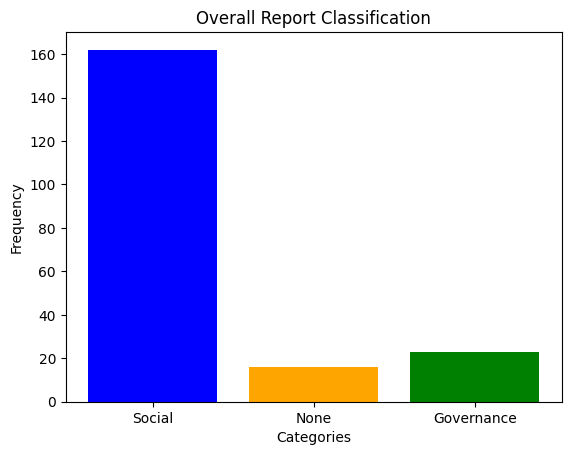

In [18]:
import matplotlib.pyplot as plt
from collections import Counter


labels, counts = zip(*Counter([res["label"] for res in results]).items())

plt.bar(labels, counts, color=['blue', 'orange', 'green'])
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Overall Report Classification")
plt.show()


In [3]:
text = """Các chất độc hại trong không khí như khí CO, SO2, NO2, PM2.5, PM10, Ozone... có thể gây ra các vấn đề sức khỏe
nghiêm trọng. Với FPT, tài sản lớn nhất là con người. Vì vậy, ngoài việc tạo điều kiện tốt nhất để CBNV phát triển
tài năng, Tập đoàn còn đề cao việc theo dõi và kiểm soát môi trường không khí tại nơi làm việc đảm bảo một môi
trường làm việc an toàn và lành mạnh cho nhân viên giúp nâng cao năng suất, tăng lao động và giảm thiểu các rủi
ro pháp lý liên quan đến sức khỏe và an toàn lao động."""

nlp = pipeline("text-classification", model=finbert, tokenizer=tokenizer)
results = nlp(text, truncation=True)
results


Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'label': 'Social', 'score': 0.4798603653907776}]